# Word2Vec Encoder

In this notebook, we will use the Word2Vec encoder to encode the text data into a vector representation.

In [2]:
# import all libraries needed to use the Word2VecEncoder
import numpy as np
import gensim.downloader as api

# For heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
w2v = api.load('word2vec-google-news-300')

In [4]:
words = [
    "chair",
    "table",
    "couch",
    "bed",
    "desk",
    "lamp",
    "rug",
    "pillow",
    "tv",
    "picture",
    "window",
    "chandelier", # >1 token in BERT
    "painting",
    "carpet",
    "mug",
]

word_embeddings = [w2v[word] for word in words]

for word, emb in zip(words, word_embeddings):
    # All of them should be of size 300
    print(word, emb.shape)

chair (300,)
table (300,)
couch (300,)
bed (300,)
desk (300,)
lamp (300,)
rug (300,)
pillow (300,)
tv (300,)
picture (300,)
window (300,)
chandelier (300,)
painting (300,)
carpet (300,)
mug (300,)


### Similarity matrix using Word2Vec

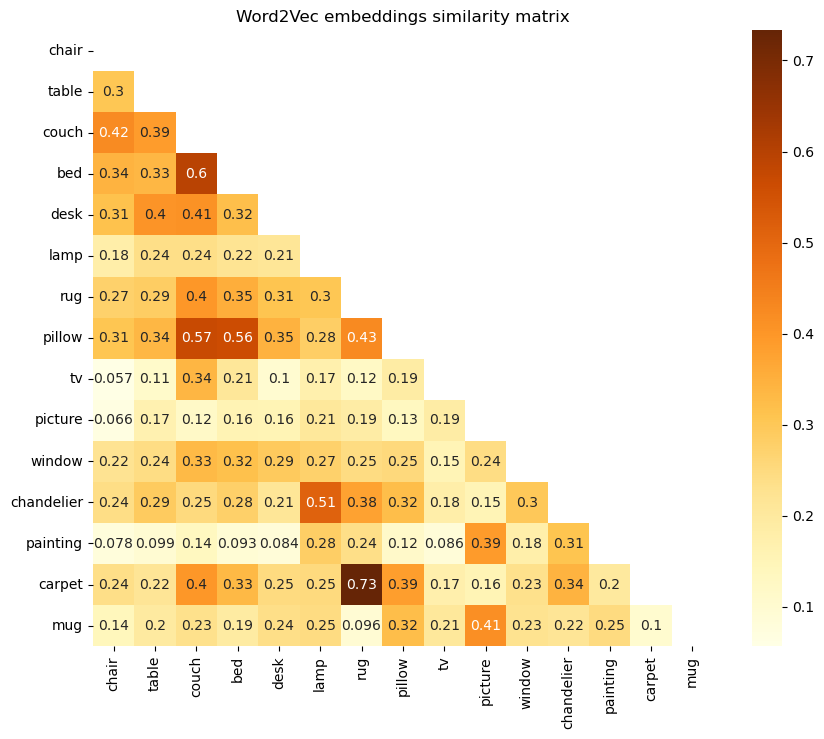

In [5]:
# Compute a similarity matrix between all words using **word2vec** and print the similarity matrix as a heatmap
similarity_matrix = np.zeros((len(words), len(words)))

for i in range(len(words)):
    for j in range(len(words)):
        similarity_matrix[i, j] = w2v.similarity(words[i], words[j])

mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, cmap='YlOrBr', annot=True, mask=mask)
plt.title("Word2Vec embeddings similarity matrix")
plt.show()

### Nearest neighbors using Word2Vec

For each word, compute the 5 most similar words using **word2vec** and print them in a table with similarity rounded to 3 decimal places

In [45]:
# Print a table of word <> #1 (similarity) <> ... <> #5 (similarity)
print(f"{'Word':<25} {'#1':<25} {'#2':<25} {'#3':<25} {'#4':<25} {'#5':<25}")
print(f"{'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25}")

def print_most_similar(pred):
    word, prob = pred
    return f"{str(round(prob,2)) + ':' + word:<25}"

for i, word in enumerate(words):
    most_similar = w2v.most_similar(word, topn=5)
    print(f"{word:<25} {print_most_similar(most_similar[0])} {print_most_similar(most_similar[1])} {print_most_similar(most_similar[2])} {print_most_similar(most_similar[3])} {print_most_similar(most_similar[4])}")

Word                      #1                        #2                        #3                        #4                        #5                       
------------------------- ------------------------- ------------------------- ------------------------- ------------------------- -------------------------
chair                     0.79:chairs               0.75:Chair                0.63:chairperson          0.63:chairwoman           0.62:chairman            
table                     0.7:tables                0.5:ConocoPhillips_BPAmerica 0.47:Capitalized_Included 0.47:tray                 0.46:dining_room         
couch                     0.83:sofa                 0.74:recliner             0.7:couches               0.67:comfy_couch          0.65:futon               
bed                       0.66:beds                 0.6:couch                 0.58:bassinette           0.58:sofa                 0.58:sleep               
desk                      0.7:desks                 0.54:Drob